In [2]:
import numpy as np

k = 5
state = (1/np.sqrt(8))*np.array([np.exp(-1j*2*np.pi*k*(0)/8),np.exp(-1j*2*np.pi*k*(1)/8),
                                 np.exp(-1j*2*np.pi*k*(2)/8),
 np.exp(-1j*2*np.pi*k*3/8),np.exp(-1j*2*np.pi*k*4/8),np.exp(-1j*2*np.pi*k*5/8),
 np.exp(-1j*2*np.pi*k*6/8), np.exp(-1j*2*np.pi*k*7/8)])

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector


qubits = 3 

circuit = QuantumCircuit(qubits, qubits)
circuit.initialize(state)
circuit.append(QFT(qubits),range(qubits))
circuit.measure(range(qubits),range(qubits))

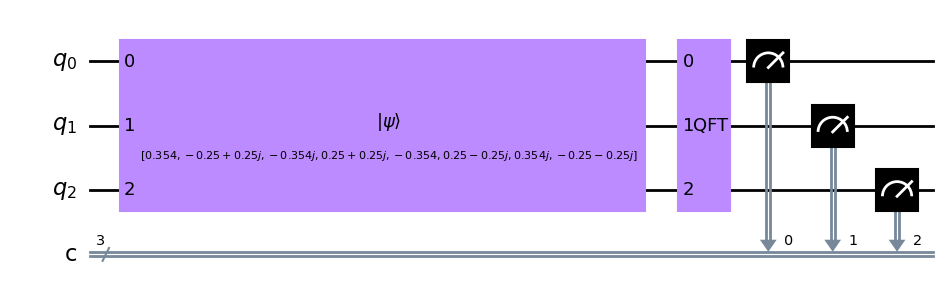

In [4]:
circuit.draw(output="mpl")

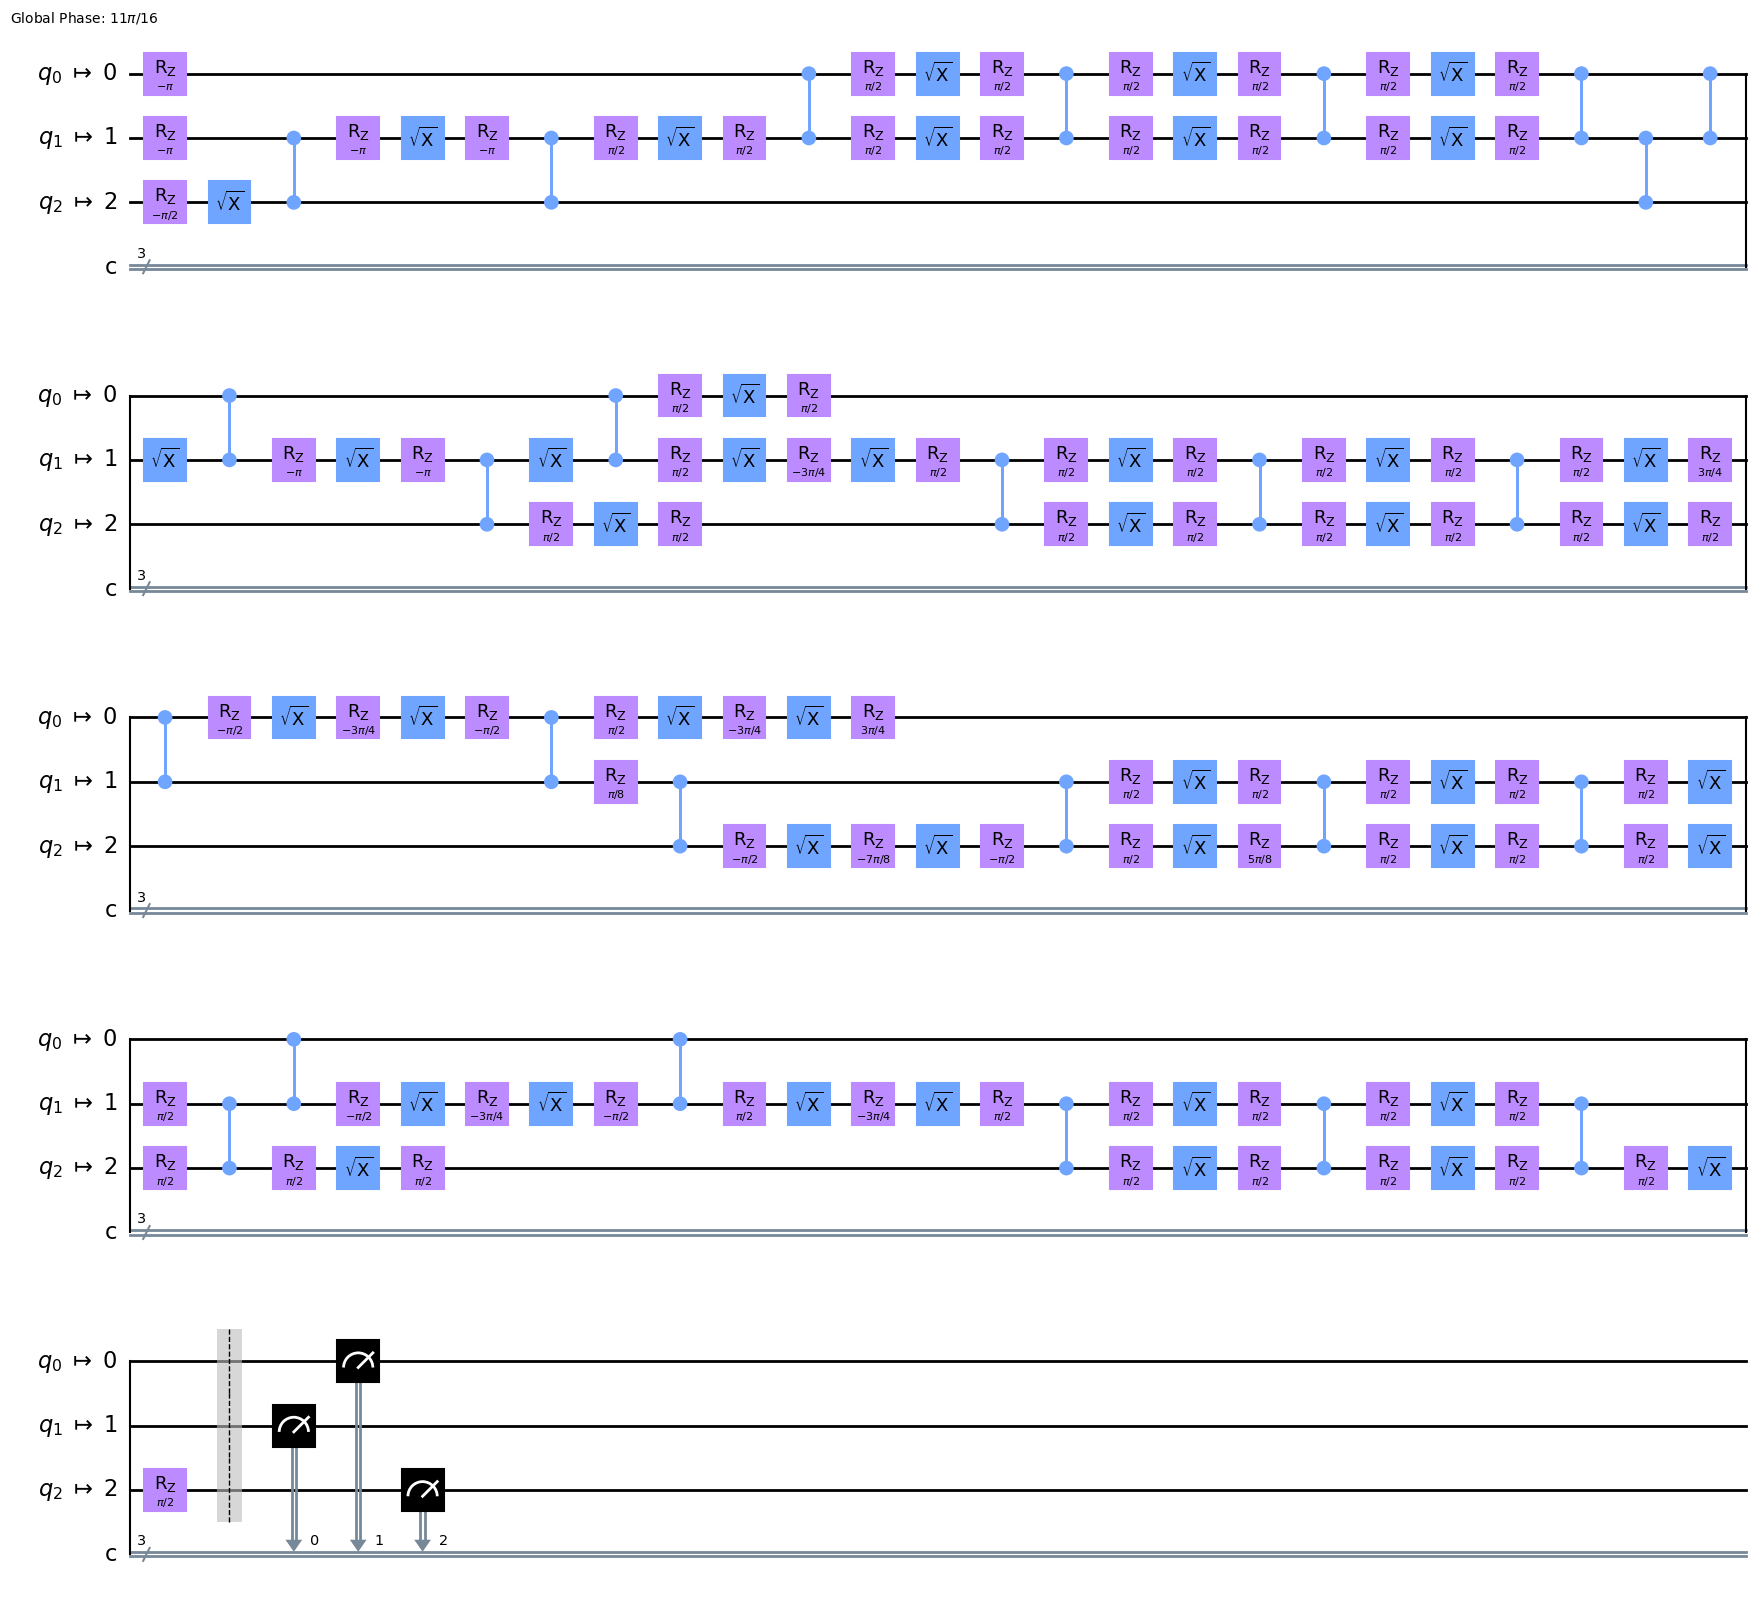

In [8]:
from qiskit.compiler import transpile

new_circuit = transpile(circuit, basis_gates = ['cz', 'sx', 'rz'], coupling_map =[[0, 1], [1, 2]] , optimization_level=1)
new_circuit.draw("mpl")